# Ch 6. 학습 관련 기술들
## 6.1.2 SGD

In [1]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr *grads[key]
            
        

- 초기화 시 받는 인수느 lr 은 learning rate.> 인스턴스 변수로 유지한다.  
- update(params,grads) method는 SGD에서 반복적으로 불린다. 
- params. grads는 5단원에서 나왔던 것처럼 딕셔너리 변수이다. (parmas['W1'], grads['W1'] 과 같이 가중치 매개변수와 기울기를 저장.)

## 6.1.4 Momentum

In [12]:
import numpy as np
class Momentum:
    def __init__(self,lr = 0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None #v는 속도를 나타내는 변수, 식에서는 알파 = momentum.(0.9)
        
    def update(self, params, grads): # 초기화 부분
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
            for key in params.keys():
                self.v[key] = self.momentum*self.v - self.v* grads[key] 
                params[key] += self.v

In [11]:
x= np.zeros_like([5,5]) # zeros_like: 차원과 안의 원소의 갯수를 0으로. 
print(x) 
print(x.shape)

[0 0]
(2,)


## 6.1.5 AdaGrad
 - 신경망 학습 시 lr값이 중요하다. 이 값이 너무 작으면 학습 시간이 너무 길어지고, 너무 크면 학습이 제대로 이루어 지지않는다. 
 - 학습률 감소(learning rate decay) 기법을 이용. 처음에는 크게 학습하다가 조금씩 작게 학습한다.( 실제 신경망 학습에 자주쓰인다.)
 - 새로운 변수 h : 기존기울기 값을 제곱(element_wise로 계산)
 + AdaGrad의 문제점 및 개선: 학습을 진행할 수록 갱신 강도가 약해진다. 무한히 학습 시 갱신량이 0 이 되게 된다. -> RMSProp
 + RMSProp: 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영한다. (지수이동평균) - 과거기울기의 반영규모 지수함수적으로 낮춘다.

In [14]:
class AdaGrad:
    def __init__(self, lr =0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h={}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.aqrt(self.h[key]) + 1e-7)  #1e-7을 더하는 이유는 square root 내부값으로 0 이 들어가도 0으로 나누는 것을 방지.

## 6.1.6. Adam
Adam에서는 hyperparmeter 3개가 있다. 
-  지금까지의 학습률(alpha) 
- 일차 모멘텀용 계수(beta 1) > 논문에서의 기본 설정값 = 0.9 
- 이차 모멘텀용 계수(beta 2) > 논문에서의 기본 설정값 = 0.999

In [ ]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


### 아래는 Adam의 식이다. 

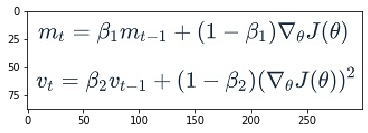

In [41]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
x = imread('ad1.jpg')
y = imread('add2.jpg')
plt.imshow(x)

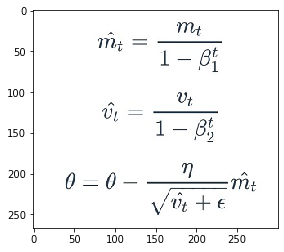

In [42]:
plt.imshow(y)

## 6.2.2 은닉층의 활성화 값 분포

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x= np.random.rand(1000,100) #1000개의 데이터
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x= activations[i-1]
        
    #w =np.random.randn(node_num, node_num) * 1
    #w= np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] =z
    
#5개의 층이 있으며 각 층의 뉴런은 100개. 
# 입력데이터로 100개의 데이터를 정규분포로 무작위로 생성하여 5층 신셩망에 흘린다. 
# 가중치 (W)로 표준편차가 1인 정규 분포를 이용. 표준편차를 바꿔가며 활성화값들을 살펴보자.

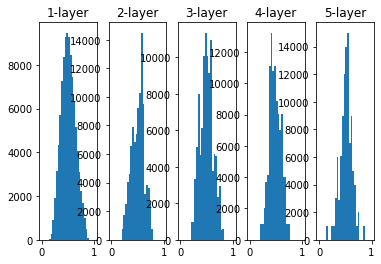

In [62]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+ "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt. show()

In [54]:
print(activations.items())
print(len(activations))

dict_items([(0, array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])), (1, array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])), (2, array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])), (3, array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])), 

##### 가중치의 초기값이 1일때: 활성화 값들이 0과 1에 치우쳐 기울기(gradient) 소실이 일어난다. 
##### 가중치의 초기값이 0.01일때: 활성화 값들이 0.5에 몰려있어 표현력이 제한된다. 
### 이를 해결하기 위해 Xavier 초깃값을 사용한다.

## 6.2.3 ReLU 사용 시 가중치 초깃값
### Xavier > 활성화 함수가 선형일때를 전제로 한것. (sigmoid, tanh 중앙부분이 선형)
### ReLU에 특화된 초깃값은 He 초깃값. 

In [26]:
def ReLU(x):
    return np.maximum(0, x)

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x= np.random.randn(1000,100) #1000개의 데이터
node_num = 100
hidden_layer_size = 5
activations = {}


for i in range(hidden_layer_size):
    if i != 0:
        x= activations[i-1]
        
    #w =np.random.randn(node_num, node_num) * 1
    #w= np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    w=np.random.randn(node_num,  node_num) * np.sqrt(2.0 / node_num)
    a = np.dot(x,w)
    #z = sigmoid(a)
    z= ReLU(a)
    
    activations[i] =z

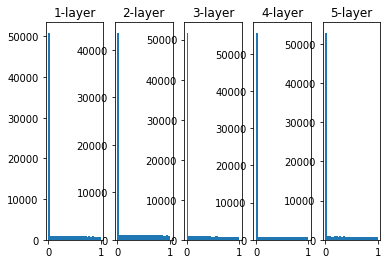

In [32]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+ "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt. show()

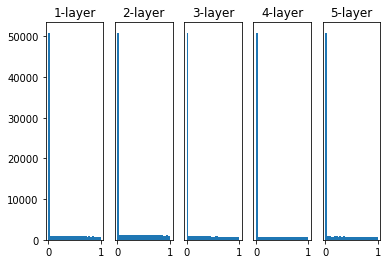

In [33]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## 6.3 배치 정규화

### 배치 정규화가 많이 사용되는 이유
- 학습을 빨리진행할 수 있다.
- 초깃값에 크게 의존하지 않는다.
- 오버피팅을 억제한다. > dropout 필요성 낮아짐

## 6.4 바른 학습을 위해
## 6.4.1 오버피팅
- 매개변수가 많고 표현력이 높은 모델
- 훈련데이터가 적을때

In [39]:
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True)

#오버피팅을 위해 학습 데이터 수를 줄인다. 
x_train = x_train[:300]
t_train = t_train[:300]

epoch:0, train acc:0.10666666666666667, test acc:0.0978
epoch:1, train acc:0.1, test acc:0.1043
epoch:2, train acc:0.12, test acc:0.1109
epoch:3, train acc:0.12333333333333334, test acc:0.1136
epoch:4, train acc:0.13, test acc:0.1201
epoch:5, train acc:0.14333333333333334, test acc:0.1241
epoch:6, train acc:0.15666666666666668, test acc:0.131
epoch:7, train acc:0.17333333333333334, test acc:0.1372
epoch:8, train acc:0.18, test acc:0.1418
epoch:9, train acc:0.19, test acc:0.1459
epoch:10, train acc:0.21333333333333335, test acc:0.1559
epoch:11, train acc:0.22333333333333333, test acc:0.1642
epoch:12, train acc:0.24, test acc:0.1674
epoch:13, train acc:0.25333333333333335, test acc:0.169
epoch:14, train acc:0.24666666666666667, test acc:0.1721
epoch:15, train acc:0.2733333333333333, test acc:0.1875
epoch:16, train acc:0.29, test acc:0.204
epoch:17, train acc:0.31, test acc:0.2138
epoch:18, train acc:0.32666666666666666, test acc:0.2293
epoch:19, train acc:0.33, test acc:0.244
epoch:20, t

epoch:162, train acc:1.0, test acc:0.7616
epoch:163, train acc:1.0, test acc:0.7617
epoch:164, train acc:1.0, test acc:0.7617
epoch:165, train acc:1.0, test acc:0.7621
epoch:166, train acc:1.0, test acc:0.7616
epoch:167, train acc:1.0, test acc:0.755
epoch:168, train acc:1.0, test acc:0.7593
epoch:169, train acc:1.0, test acc:0.7617
epoch:170, train acc:1.0, test acc:0.7608
epoch:171, train acc:1.0, test acc:0.7637
epoch:172, train acc:1.0, test acc:0.7599
epoch:173, train acc:1.0, test acc:0.7596
epoch:174, train acc:1.0, test acc:0.7625
epoch:175, train acc:1.0, test acc:0.7634
epoch:176, train acc:1.0, test acc:0.7623
epoch:177, train acc:1.0, test acc:0.7634
epoch:178, train acc:1.0, test acc:0.7643
epoch:179, train acc:1.0, test acc:0.7615
epoch:180, train acc:1.0, test acc:0.763
epoch:181, train acc:1.0, test acc:0.7602
epoch:182, train acc:1.0, test acc:0.7612
epoch:183, train acc:1.0, test acc:0.7616
epoch:184, train acc:1.0, test acc:0.7637
epoch:185, train acc:1.0, test acc:0

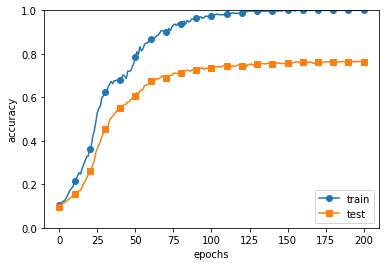

In [40]:
network =MultiLayerNet(input_size = 784, hidden_size_list =[100, 100, 100, 100, 100, 100], output_size = 10)
optimizer = SGD(lr = 0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


## 6.4.3 드롭아웃

In [43]:
class dropout:
    def __init__(self, dropout_ratio = 0.5):
        self.dropout_ratio = dropour_ratio
        self.mask = None
    
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.randn(*x.shape) > self.dropout_ratio
            return x* self.mask
        else :
            return x * (1.0 - self.dropout_ratio)  
        
    def backward(self, dropout):
        return dout * self.mask